

# <span style="color:salmon">**Progress in Nepal: A Visualization Notebook from the**</span> <span style="color:red">**People's** </span><span style="color:salmon">**Perspective**</span> <img src="http://icons.iconarchive.com/icons/icons-land/vista-flags/256/Nepal-Flag-1-icon.png" width="50" height="50" />


#### Note: maps display better on a wide screen :)

In [2]:
# setting up environment

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import geopandas as gpd
import folium
import json
from folium.plugins import MarkerCluster
from folium import IFrame
sns.set()

In [3]:
# import World Bank data (stored as CSVs)

location = r'C:\Users\kitsc\A Jupyter Collection\final_project' + '\\'
countries = ['Afghanistan', 'Bangladesh', 'Sri Lanka', 'Bhutan', 'India', 'Pakistan', 'Nepal']

def get_data(name):
    data = pd.read_csv(location + f"world_bank\{name}.csv")
    return data.loc[data['Country Name'].isin(countries)].set_index(
        ['Country Name']).T.drop(['Country Code', 'Indicator Name', 'Indicator Code'])

mortality = get_data('mortality')
contraception = get_data('contraception')
enrollment = get_data('enrollment')
fertility = get_data('fertility')
gdppc = get_data('gdppc')
undernourishment = get_data('undernourishment')
labour = get_data('labour')

In [4]:
# defining functions to make graphs of Nepal

c= sns.husl_palette(7, h=.5, s=0.8, l=0.7)

def make_graph(df, labels, title, ylabel, minx=1960, maxx=2018, ax1=0, ax2=0, exclusion=''):
    """
    Make a simple graph of several countries' data.
    Label it, set x-limits.
    """
    # setting up graph
    ax[ax1][ax2].set_title(title)
    ax[ax1][ax2].set_ylabel(ylabel)
    ax[ax1][ax2].set_xlim(minx, maxx)
    # plotting countries
    for (i, (country, label)) in enumerate(zip(countries, labels)):
        if country!= exclusion:
            plot_country(df, country, i, label[0], label[1], ax1, ax2)
    return ax[ax1][ax2]

def plot_country(df, country, colour, i=2, j=2, ax1=0, ax2=0):
    """
    Plot line data of a country, assigning line
    colour and label positioning.
    """
    x= np.arange(1960, 2019)
    y = df[country].values.astype(np.double)
    mask = np.isfinite(y)
    if country == "Nepal":
        ax[ax1][ax2].plot(x[mask], y[mask], linewidth=2.5, c= 'red')
        ax[ax1][ax2].text(i, j, country, color= 'red')
    else:
        ax[ax1][ax2].plot(x[mask], y[mask], linestyle="dashed", c= c[colour])
        ax[ax1][ax2].text(i, j, country, color= c[colour])
    return ax[ax1][ax2]

<span style="color:salmon">
    
## **Despite being one of the poorest countries in South Asia...**
    
</span>

C:\Users\kitsc\Miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


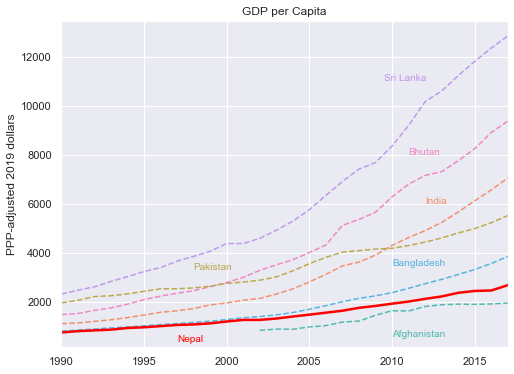

In [5]:
# GDP per capita

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = [[ax]]

gdppc_labels = [(2010, 600), (2010, 3500), (2009.5, 11000), (2011, 8000), (2012, 6000), (1998, 3300), (1997, 400)]
make_graph(gdppc, gdppc_labels, 'GDP per Capita', 'PPP-adjusted 2019 dollars', minx=1990, maxx=2017)

fig.show()

<span style="color:salmon">
    
## **...Nepal has made great progress on important social indicators.**
    
</span>

C:\Users\kitsc\Miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


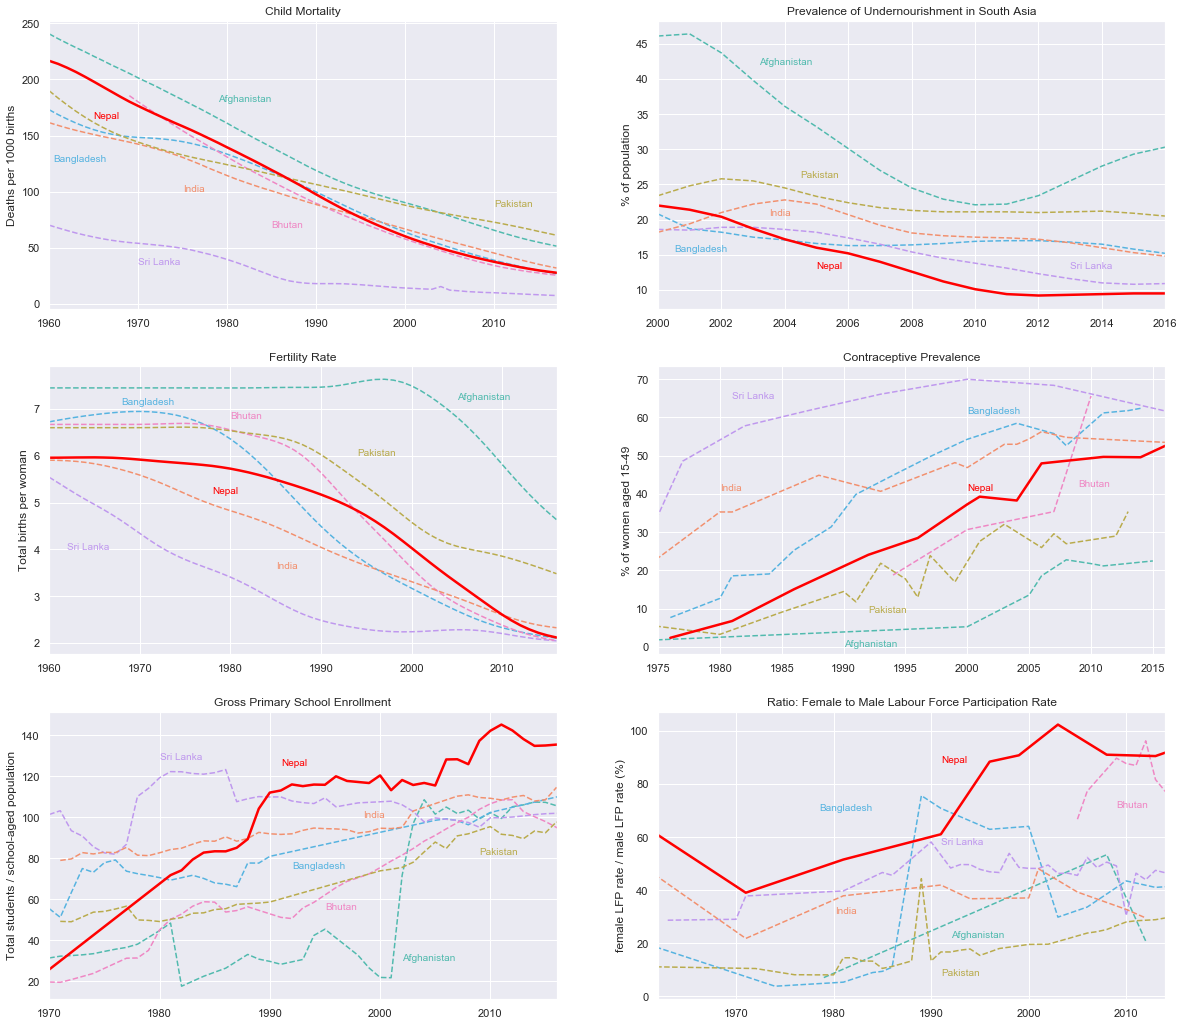

In [6]:
fig, ax = plt.subplots(3,2, figsize=(20,18))

# child mortality
mortality_labels = [(1979, 180), (1960.5, 127), (1970, 35), (1985, 68), (1975, 100), (2010, 87),(1965, 165)]
make_graph(mortality, mortality_labels, "Child Mortality", "Deaths per 1000 births", minx=1960, maxx=2017)

# prevalence of undernourishment
undernourishment_labels = [(2003.2, 42), (2000.5, 15.5), (2013, 13), (0,0), (2003.5, 20.5), (2004.5, 26), (2005, 13)]
make_graph(undernourishment, undernourishment_labels, "Prevalence of Undernourishment in South Asia", "% of population", 
           minx=2000, maxx=2016, ax1=0, ax2=1, exclusion='Bhutan')

# contraceptives prevalence
contraception_labels = [(1990, 0), (2000, 61), (1981, 65), (2009, 42), (1980, 41), (1992, 9), (2000, 41)]
make_graph(contraception, contraception_labels, "Contraceptive Prevalence", "% of women aged 15-49", minx=1975, maxx=2016, ax1=1, ax2=1)

# fertility rate
fertility_labels = [(2005, 7.2), (1968, 7.1), (1962, 4), (1980, 6.8), (1985, 3.6), (1994, 6), (1978, 5.2)]
make_graph(fertility, fertility_labels, "Fertility Rate", "Total births per woman", minx=1960, maxx=2016, ax1=1, ax2=0)

# gross primary enrollment
enrollment_labels = [(2002, 30), (1992, 75), (1980, 128), (1995, 55), (1998.5, 100), (2009, 82), (1991, 125)]
make_graph(enrollment, enrollment_labels, "Gross Primary School Enrollment", "Total students / school-aged population", 
           minx=1970, maxx=2016, ax1=2, ax2=0)

# female-male labour rate ratio
labour_labels = [(1992, 22), (1978.5, 70), (1991, 57), (2009, 71), (1980.2, 31), (1991, 8), (1991, 88)]
make_graph(labour, labour_labels, "Ratio: Female to Male Labour Force Participation Rate", "female LFP rate / male LFP rate (%)", 
           minx=1962, maxx=2014, ax1=2, ax2=1)

fig.show()

<span style="color:salmon">
    
# **But which of these improvements to daily life do Nepalis value the most?**
    
</span>

In [7]:
# define functions for cleaning and merging data

spellcheck = {'Sindhupalchowk' : 'Sindhupalchok', 
              'Dhanusha' : 'Dhanusa',
              'Makawanpur' : 'Makwanpur',
              'Panchathar' : 'Panchthar',
              'Udaypur' : 'Udayapur',
              'Parvat' : 'Parbat',
              'Gorakha' : 'Gorkha',
              'Kapilvastu' : 'Kapilbastu',
              'Saptari Rajbiraj' : 'Saptari',
              'Samkhuwasabha' : 'Sankhuwasabha',
              'Tanahaun' : 'Tanahu'}

def correct_spelling(df, series):
    '''
    Uses a dictionary to correct spelling 
    discrepancies of Nepali districts.
    '''
    for misspelt, correct in zip(spellcheck.keys(), spellcheck.values()):
        df.loc[df[series].isin([misspelt]), series] = correct
    return df

def add_count(variables, target_df, variables_df):
    '''
    By community, aggregate binary variables into
    count variables and merge to a new dataset.
    '''
    for var in variables:
        a = variables_df.groupby('xhpsu').sum()[var]
        target_df = target_df.merge(a, left_on='xhpsu', right_index=True, how='left')
        target_df.loc[target_df[var].isnull(), var] = 0
    return target_df

#### Importing Data

In [8]:
### import district shapefiles

dist = gpd.read_file('https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_NPL_shp.zip', layer = 3)
dist['district'] = dist['NAME_3'].str.lower()
dist['district'].replace(to_replace='kavrepalanchok', value='kavre', inplace=True)
dist_key = dist[['district', 'geometry']]

In [9]:
### import rural community data from raw NLSS dataset

# data on where the community is located
rc_key = pd.read_stata(location + 'nlss_dataset/rural_community/xr70_sr0.dta', 
                     columns = ["xhpsu","r0_dist"]).rename(columns = {'r0_dist' : 'district'})


# data on why community leaders think life is better
reasons = pd.read_stata(location + 'nlss_dataset/rural_community/xr85_sr4.dta')

reason_variables = {
    'better_services' : 'better services, water supply or roads',
    'better_projects' : 'local development projects',
    'better_peace' : 'greater peace and security',
    'better_harvest' : 'good weather/rains/harvest',
    'better_economy' : 'more jobs/economic improvements'}

for variable, response in zip(reason_variables.keys(), reason_variables.values()): # creating binaries from categoricals
    reasons[variable] = 0 
    reasons.loc[(reasons['r4_22a']== response) | (reasons['r4_22b']== response), variable] = 1
    
    
# data on the development programs in each community
programs = pd.read_stata(location + 'nlss_dataset/rural_community/xr86_sr4a.dta')

program_variables = {
    'infra' : ['power','transport/communication'],
    'water' : ['drinking water'],
    'ag' : ['agriculture', 'forestry', 'irrigation'],
    'economy' : ['credit', 'poverty alleviation', 'income generating activities'],
    'social' : ['education', 'health/nutrition/family planning']}

for variable, response in zip(program_variables.keys(), program_variables.values()): # creating binaries from categoricals
    programs[variable] = 0 
    programs.loc[programs['r4_02'].isin(response), variable] = 1
    

# data on the women's groups in each community
xr87 = pd.read_stata(location + 'nlss_dataset/rural_community/xr87_sr4b.dta')
womens_group = xr87[xr87['r4_14']=="women user group"].drop(columns = ["r4_13", "xstra", "r4_17", 'r4_14'])

womens_group.rename(columns= {
    'r4_15' : 'years_operating',
    'r4_16' : 'no_households',
    'r4_18' : 'no_meetings_12m',
    'r4_19' : 'vdc_attend',
    'r4b_ln' : 'group_no'}, inplace=True)

In [10]:
### import district data on victims of the Nepali Civil War

victims = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/2702605/?variables=v15720134')
victims['district'] = victims['IncidentDistrict'].str.capitalize()
victims = victims.groupby('district').count().rename(columns={'IncidentDistrict': 'victims'}).reset_index()
victims = correct_spelling(victims, 'district')

In [11]:
### import rainfall data

url = 'http://data.opennepal.net/sites/all/modules/pubdlcnt/pubdlcnt.php?file=http://data.opennepal.net/sites/default/files/resources/annual%20rainfall%20by%20station.csv&nid=4321'
rainfall = pd.read_csv(url).rename(columns={'Rainfall (mm)' : 'rain'})

rainfall['Station'] = rainfall['Station'].str.split(',', expand=True)[0].str.strip() # clean data
rainfall['rain'] = pd.to_numeric(rainfall['rain'].str.replace('-',"").str.replace('NA',"").str.strip())
rainfall = correct_spelling(rainfall, 'Station')    

rainfall = rainfall.groupby('Station').mean()['rain'] # get average rainfall

#### Merging Data

In [12]:
### merge relevant data to each rural community

# merge reponses to 'reasons for a better life'
rc_key = rc_key.merge(reasons[list(reason_variables.keys()) + ['xhpsu']], on='xhpsu', how ='right')

# merge number of development programs
rc_key = add_count(list(program_variables.keys()), rc_key, programs)

# merge number of women's groups
womens_group['wg_count'] = 1
rc_key = add_count(['wg_count'], rc_key, womens_group)

#### Aggregating Data

In [13]:
# I aggregate community-level data to the district level (this is statistically a bit shady,
# but it looks much better than a community-level map; the NLSS is a national sample survey,
# so only a selection of communities get asked and that makes for a very patchy map...)

# aggregate community-level data
district_averages = rc_key.groupby('district').mean().drop(columns='xhpsu')
districts = dist_key.merge(district_averages, on=['district'], how='left')
districts['district']= districts['district'].str.capitalize()

# merge district-level victims data
districts = districts.merge(victims, on='district', how='left')
districts.loc[districts['district'].isin(['Manang']), 'victims'] = 0 # no casualties in one district

# merge district-level rainfall data
districts = districts.merge(rainfall, left_on='district', right_index=True, how='left')

#### Mapping

In [15]:
# define some mapping functions

def basemap():
    '''
    Generate a basemap of Nepal.
    '''
    m = folium.Map(location=[28.6, 84], zoom_start=7, tiles=None)
    return m

def embed_map(m): #stolen from Stack Exchange
    '''
    Export and re-import a map so that 
    it displays in Google Chrome even with a lot of shapes.
    '''
    folium.map.LayerControl(position='bottomleft', collapsed=False).add_to(m)
    from IPython.display import IFrame
    m.save('index.html')
    return IFrame('index.html', width='100%', height='480px')

def choropleth(column, fill_color, bins=6, line_color='#d5dbe5', name=None, legend_name=None, fields=[], aliases=[]):
    '''
    Make a choropleth layer.
    '''
    k = folium.Choropleth(geo_data=districts,
                          data=districts,
                          key_on='feature.properties.district',
                          columns=['district', column],
                          fill_color=fill_color,
                          bins=bins,
                          nan_fill_color='#a6acb5',
                          line_color=line_color,
                          highlight=True,
                          smooth_factor = 0.6,
                          overlay=False, 
                          name = name,
                          legend_name=legend_name).add_to(m)
    folium.TileLayer('cartodbpositron').add_to(k)
    fields.append(column)
    aliases.append('Share of leaders who agree' if 'better' in column else name)
    return k

def labels(layers, names, aliases):
    '''
    Add popup labels to a map layer.
    '''
    for layer in layers:
        layer.geojson.add_child(folium.features.GeoJsonTooltip(
            fields=['district'] + names, aliases= ['District'] + aliases, sticky=False, localize=True))
    return

<span style="color:salmon">
    
# **These are the top 5 reasons...**
    
</span>

<span style="color:green">
    
## **#5 "Life is better because of good weather, rains, and harvests."**
    
</span>

In [ ]:
m = basemap()
f, a = [], []

s = choropleth('better_harvest', 'Blues', bins=[0, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
           name = "Life is better because of good weather, rains and harvests.",
           legend_name = 'Share of community leaders who agree', fields = f, aliases = a)

t = choropleth('ag', 'YlGn',
           name = "Average no. agricultural programs",
           legend_name = 'Average number of agricultural programs per community', fields = f, aliases = a)

u = choropleth('rain', 'GnBu',
           name = "Average annual rainfall",
           legend_name = 'Average annual rainfall at local station (2001-2011)', fields = f, aliases = a)

labels([s,t,u], f, a)
m.plot()

<span style="color:hotpink">
    
## **#4 "Life is better because of local development projects."**
    
</span>

In [26]:
m = basemap()
f, a = [],[]

s = choropleth('better_projects', 'Blues',
           name = "Life is better because of local development projects.",
           legend_name = 'Share of community leaders who agree', fields = f, aliases = a)

t = choropleth('wg_count', 'PuRd', bins=[0, 0.25, 0.5, 1, 1.5, 2, 2.8],
           name = "Average no. women's groups",
           legend_name = 'Average number of women groups per community', fields = f, aliases = a)

labels([s,t], f, a)
embed_map(m)

<span style="color:#ea6146">
    
## **#3 "Life is better because of increased peace and security."**
    
</span>

In [27]:
m = basemap()
f, a = [], []

# peace and security question
s = choropleth('better_peace', 'Blues',
           name = "Life is better because of increased peace and security.",
           legend_name = 'Share of community leaders who agree', fields = f, aliases = a)

# war victims
t = choropleth('victims', 'YlOrRd', bins = [0, 50, 100, 200, 300, 600, 850],
           name = "Number of civil war victims",
           legend_name = 'Number of victims during Nepali Civil War (1996-2006)', fields = f, aliases = a)

labels([s,t], f, a)
embed_map(m)

<span style="color:red">
    
## **#2 "Life is better because of more jobs and economic improvements."**
    
</span>

In [28]:
m = basemap()
f, a = [],[]

s = choropleth('better_economy', 'Blues',
           name = "Life is better because of more jobs and economic improvements.", fields = f, aliases = a,
           legend_name = 'Share of community leaders who agree')

t = choropleth('economy', 'YlOrBr',
           name = "Average no. economic programs",
           legend_name = 'Average number of credit, income generation, and poverty programs per community', fields = f, aliases = a)

labels([s,t], f, a)
embed_map(m)

<span style="color:salmon">
    
## *And the winner ...*
    
</span>

<span style="color:#a81b1b">
    
# **#1 "Life is better because of improved public infrastructure."**
    
</span>

In [29]:
m = basemap()
f,a = [],[]

# peace and security question
s = choropleth('better_services', 'Blues',
           name = "Life is better because of better services, roads, and water supply.",
           legend_name = 'Share of community leaders who agree', fields = f, aliases = a)
t = choropleth('infra', 'YlGn',
          name = 'Average no. road/power programs',
          legend_name = 'Average number of road and power programs per community', fields = f, aliases = a)
u = choropleth('water', 'GnBu',
          name = 'Average no. drinking water programs',
          legend_name = 'Average number of drinking water programs per community', fields = f, aliases = a)

labels([s,t,u], f, a)
embed_map(m)